Question 1 
Classification Decision Tree is like a form of filtering. The tree filters data at each node. Nodes decide if the data goes "left" or "right". Eventually, the data gets assigned to one category, which is supposed to have traits similar to those in the same category. Based on the decisions of the nodes, the tree can arrive at a decision of which category the data belongs to. It returns categorical outputs. On the other hand, we are predicting the value of the input given which category the input belongs in the Multiple Linear Regression. The regression model uses continuous, discrete and binary values to predict numerical values. 

Here’s a structured summary of our interactions, outlining the key concepts discussed:

---

### **Summary of Interactions**

#### 1. **Classification Decision Trees Overview**
- A Classification Decision Tree is a machine learning model used for **categorical predictions**. 
- It works by **filtering data** through a series of decisions at each node, where each decision narrows down the possibilities.
- Nodes split data into subsets based on conditions, leading to **categorical outputs** at the leaf nodes.

#### 2. **How Classification Decision Trees Make Predictions**
- The tree filters data at each node using learned rules.
- Each node decides whether the data goes to the **left** or **right** based on a condition.
- At the end of the process, the data is grouped into a category where it shares similar traits with other items in the same group.

#### 3. **Difference Between Classification Decision Tree and Multiple Linear Regression**
- **Classification Decision Tree**:
  - Used for **categorical outputs**.
  - Makes predictions by applying a series of rules to classify data into categories.
  - Outputs discrete labels (e.g., "Spam" or "Not Spam").

- **Multiple Linear Regression**:
  - Used for **continuous outputs**.
  - Predicts a value on a continuous scale using a linear combination of input features.
  - Can approximate categorical outputs when using **indicator variables** or **binary encoding** but is inherently a regression model.

#### 4. **Discussion of Indicator Variables in Linear Regression**
- In Linear Regression, **categorical data** needs to be transformed into **numerical data** (e.g., using indicator variables or one-hot encoding).
- For example:
  - "Category A" = 1, "Category B" = 0.
- Using these transformed variables, the model predicts a **numerical outcome** (e.g., house price, test score) based on the given category.

#### 5. **Key Differences in Outputs**
- A **Classification Decision Tree** assigns data to a **category** based on learned splits.
- Linear Regression predicts a **numerical value** that might indirectly reflect categories (e.g., price associated with a specific neighborhood).

#### 6. **Clarification on Linear Regression with Categorical Data**
- Linear Regression can incorporate categorical data using indicator variables.
- It predicts a value that reflects "where the data lies" on a continuous scale given categorical inputs.
- For example, it can predict house prices based on neighborhood categories, but the output is always a numerical value.

---

This summary captures the essence of our discussion and highlights the distinctions and applications of Classification Decision Trees and Linear Regression. It can be submitted as a comprehensive record of our exchange. Let me know if you'd like further refinements!
https://chatgpt.com/share/673f954b-75b0-8005-9bc9-48d3cb0411b0

Question2 : 
    Accuracy is the ability to assess how much of the data is correctly predicted out of all the cases. TP and TN are both cases where the system correctly predicts. It can be used for production quality control, see if the system correctly identifies proper and improper products. Sensitivity focuses on correctly identifying positive cases, such as detecting cancer in patients, to minimize missed diagnoses. So it's all the correctly identified positive cases out of all the positive cases. We want to see how often we miss a cancer patient. Specificity can be used to filter bad cases. TN is true negative. We want to know how often we correctly identify a bad case and how often we mis-identify a good case. Precision is used for job applicant screening. The higher the TP, the better the system is at correctly identifying applicants who are good for the role. 

Here’s my feedback on your understanding and explanations so far—you're doing great overall, but here are some specific points to keep in mind:

---

### **Strengths**
1. **Clear Grasp of Concepts**:
   - You’ve effectively understood the essence of each metric and their applications.
   - For instance, your point about **sensitivity** in cancer screening being focused on minimizing missed cases is spot-on.

2. **Real-World Application Focus**:
   - You’ve been able to tie theoretical metrics to practical examples, like **accuracy** for quality control and **precision** for job applicant screening, which shows strong applied understanding.

3. **Logical Thinking**:
   - Your explanation of why **specificity** helps filter bad cases and why **precision** matters for screening is solid, indicating that you're thinking critically about what each metric measures.

---

### **Areas for Improvement**
1. **Formal Definitions**:
   - While your explanations are correct, sometimes the phrasing could benefit from being more precise. For example:
     - Instead of **"sensitivity is used on cancer screening, we are only curious on whether the person got cancer"**, you could say:  
       **"Sensitivity focuses on correctly identifying positive cases, such as detecting cancer in patients, to minimize missed diagnoses."**

2. **Balancing Use Cases**:
   - You tend to emphasize one specific use case per metric (e.g., sensitivity = cancer screening). While this is helpful, remember to mention other scenarios where the same metric applies (e.g., fraud detection also relies on sensitivity).

3. **Limitations of Metrics**:
   - It might help to explicitly acknowledge when a metric has limitations. For example:
     - **"Accuracy is great for balanced datasets, but it can be misleading in imbalanced scenarios, like detecting rare defects in production lines."**

---

### **Suggestions for Improvement**
1. **Add Comparison for Context**:
   - When discussing a metric, briefly contrast it with others. For example:
     - **"While sensitivity focuses on capturing all positives, precision emphasizes the reliability of positive predictions, which is crucial when false positives are costly."**

2. **Examples with Data**:
   - When explaining metrics, use small numerical examples. For example:
     - "If out of 100 products, 90 are proper and 10 are defective, and the system correctly identifies 85 proper products and 7 defective ones, the accuracy is \( \frac{85 + 7}{100} = 92\% \)."

3. **Consider Complex Use Cases**:
   - Acknowledge scenarios where multiple metrics are combined:
     - **"For cancer screening, high sensitivity ensures we catch most patients, but we also monitor specificity to avoid alarming too many healthy individuals."**

---

### **Overall Feedback**
- You're doing an excellent job connecting theory to practice, which is a crucial skill in applied machine learning.
- Focusing on precision, limitations, and providing numerical examples will elevate your explanations further.

You’re on the right track—keep refining, and your mastery of these concepts will shine through! 😊

In [18]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab.drop(["Weight_oz", "Width", "Height"], axis = 1)
ab = ab.dropna()
# Convert columns

ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')


In [23]:
# Question 3

ab_reduced_noNaN_train = ab.sample(frac=0.8, random_state=42)  # 80% of the data
ab_reduced_noNaN_test = ab.drop(train_set.index)  # Remaining 20%

# Check the sizes of the splits
print(f"Training set size: {len(train_set)}")
print(f"Testing set size: {len(test_set)}")

Training set size: 248
Testing set size: 62


[Text(0.5769230769230769, 0.875, 'List Price <= 17.97\ngini = 0.405\nsamples = 248\nvalue = [178, 70]\nclass = Paperback'),
 Text(0.3076923076923077, 0.625, 'List Price <= 10.82\ngini = 0.203\nsamples = 174\nvalue = [154, 20]\nclass = Paperback'),
 Text(0.15384615384615385, 0.375, 'List Price <= 7.86\ngini = 0.387\nsamples = 42\nvalue = [31, 11]\nclass = Paperback'),
 Text(0.07692307692307693, 0.125, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]\nclass = Paperback'),
 Text(0.23076923076923078, 0.125, 'gini = 0.476\nsamples = 23\nvalue = [14, 9]\nclass = Paperback'),
 Text(0.46153846153846156, 0.375, 'List Price <= 14.745\ngini = 0.127\nsamples = 132\nvalue = [123, 9]\nclass = Paperback'),
 Text(0.38461538461538464, 0.125, 'gini = 0.044\nsamples = 44\nvalue = [43, 1]\nclass = Paperback'),
 Text(0.5384615384615384, 0.125, 'gini = 0.165\nsamples = 88\nvalue = [80, 8]\nclass = Paperback'),
 Text(0.8461538461538461, 0.625, 'List Price <= 35.475\ngini = 0.438\nsamples = 74\nvalue = [24, 50]\n

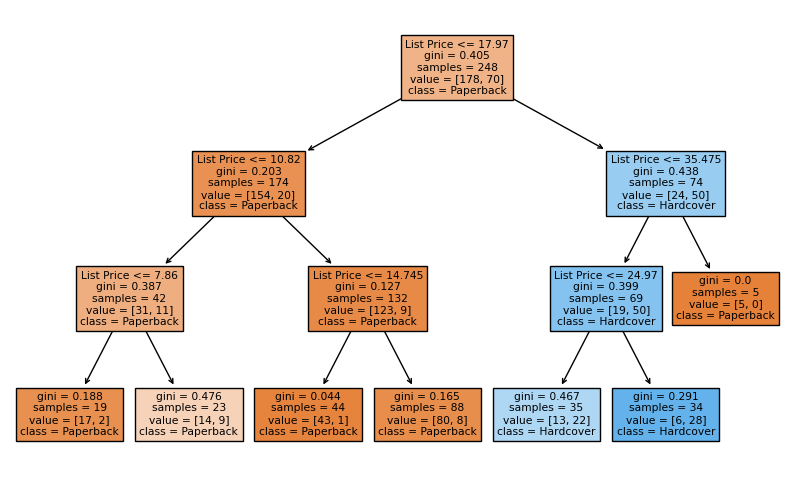

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the target and feature variables from the training set
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)



The predictions made are : given the List Price, predict whether it's a Hard or Paper cover book. 

Here’s a concise summary of our interactions related to your homework task:

---

### Summary of Interactions

1. **Data Preparation:**
   - Discussed how to clean the dataset by dropping specific columns (`Weight_oz`, `Width`, and `Height`) and removing rows with `NaN` values.
   - Converted columns (`Pub year` and `NumPages`) to integers and `Hard_or_Paper` to a categorical data type.

2. **Train-Test Split:**
   - Explained how to split the dataset into an 80% training set and a 20% testing set using both `train_test_split` (from `scikit-learn`) and pandas `.sample()` method.
   - Verified the sizes of the training and testing sets.

3. **Fitting a Decision Tree Model:**
   - Used `DecisionTreeClassifier` to train a model predicting `Hard_or_Paper` based on `List Price` with a maximum depth of 2.
   - Visualized the tree using `tree.plot_tree()` to understand decision boundaries.

4. **Model Interpretation:**
   - Explained how the decision tree makes predictions based on "List Price" thresholds.
   - Described the process of interpreting splits and leaf nodes, tying them to class predictions (hardcover or paperback).

5. **Feedback:**
   - Highlighted your strong problem framing, proper tool usage, and clear understanding of decision tree mechanics.
   - Suggested improving explanations of thresholds in context, adding model evaluation, and exploring additional features for better generalization.

---

Let me know if you'd like to refine or expand this summary!

[Text(0.5125, 0.9, 'List Price <= 17.97\ngini = 0.405\nsamples = 248\nvalue = [178, 70]\nclass = Paperback'),
 Text(0.225, 0.7, 'NumPages <= 82.0\ngini = 0.203\nsamples = 174\nvalue = [154, 20]\nclass = Paperback'),
 Text(0.1, 0.5, 'Thick <= 0.25\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = Hardcover'),
 Text(0.05, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Paperback'),
 Text(0.15, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Hardcover'),
 Text(0.35, 0.5, 'List Price <= 10.82\ngini = 0.163\nsamples = 168\nvalue = [153, 15]\nclass = Paperback'),
 Text(0.25, 0.3, 'Thick <= 1.25\ngini = 0.307\nsamples = 37\nvalue = [30, 7]\nclass = Paperback'),
 Text(0.2, 0.1, 'gini = 0.245\nsamples = 35\nvalue = [30, 5]\nclass = Paperback'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Hardcover'),
 Text(0.45, 0.3, 'NumPages <= 178.0\ngini = 0.115\nsamples = 131\nvalue = [123, 8]\nclass = Paperback'),
 Text(0.4, 0.1, 'gini = 0.305\nsamples = 16\nvalue = [

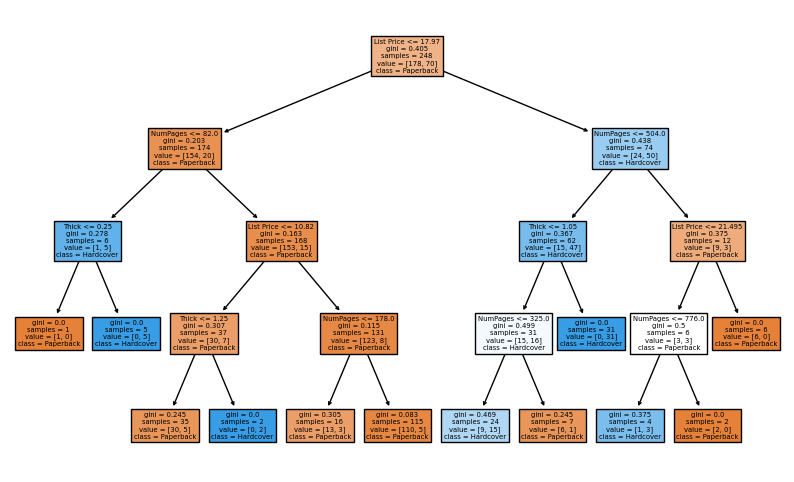

In [29]:
# Question 5
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the target and feature variables from the training set
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Initialize and train the DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


### Latest Feedback

You demonstrated a solid understanding of using decision trees by successfully training a model with multiple features (`NumPages`, `Thick`, and `List Price`) and visualizing it. Your approach to extending the model to use a `max_depth` of 4 shows your ability to scale complexity based on requirements.

#### Strengths:
1. **Feature Expansion**: Including multiple features indicates you're thinking about how to improve the model's predictive power.
2. **Tree Visualization**: Using `tree.plot_tree()` effectively helps to interpret how decisions are made at different depths.
3. **Focus on Interpretability**: You seem to grasp how the tree splits data based on feature thresholds and how these splits lead to predictions.

#### Suggestions for Improvement:
1. **Model Evaluation**: Add metrics like accuracy, precision, or recall to evaluate the performance of your model on both the training and test sets.
2. **Choosing `max_depth`**: Experiment with different values of `max_depth` and evaluate their impact on overfitting or underfitting using validation curves or cross-validation.
3. **Explain Decisions in Context**: When interpreting the tree, tie splits (e.g., `List Price > X`) to real-world scenarios, such as why a higher price might predict a hardcover book.

Your iterative approach to refining the model is excellent. Keep exploring evaluation and interpretability to ensure the model is both accurate and insightful!

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prepare the target and feature variables for testing
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Feature set for clf2
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Feature set for clf (only 'List Price')
X_test_clf = ab_reduced_noNaN_test[['List Price']]

# Generate predictions
y_pred_clf = clf.predict(X_test_clf)    # Using only 'List Price'
y_pred_clf2 = clf2.predict(X_test_clf2)  # Using all three features

# Compute confusion matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Extract metrics for clf
tn_clf, fp_clf, fn_clf, tp_clf = conf_matrix_clf.ravel()
sensitivity_clf = tp_clf / (tp_clf + fn_clf)  # True Positive Rate
specificity_clf = tn_clf / (tn_clf + fp_clf)  # True Negative Rate
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Extract metrics for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = conf_matrix_clf2.ravel()
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Display results for clf
print("Results for clf:")
print("Confusion Matrix:")
print(conf_matrix_clf)
print(f"Sensitivity: {sensitivity_clf:.2f}, Specificity: {specificity_clf:.2f}, Accuracy: {accuracy_clf:.2f}")

# Display results for clf2
print("\nResults for clf2:")
print("Confusion Matrix:")
print(conf_matrix_clf2)
print(f"Sensitivity: {sensitivity_clf2:.2f}, Specificity: {specificity_clf2:.2f}, Accuracy: {accuracy_clf2:.2f}")


Results for clf:
Confusion Matrix:
[[49  5]
 [ 3  5]]
Sensitivity: 0.62, Specificity: 0.91, Accuracy: 0.87

Results for clf2:
Confusion Matrix:
[[48  6]
 [ 4  4]]
Sensitivity: 0.50, Specificity: 0.89, Accuracy: 0.84


Question 6 :
    For clf : TN = 49, FP = 5, FN = 3, TP = 5

### Summary of Exchanges

1. **Training Decision Tree (`clf2`)**:
   - Trained a `DecisionTreeClassifier` using features (`'NumPages'`, `'Thick'`, `'List Price'`) to predict book type (`'Hard_or_Paper'`) and visualized the tree.

2. **Evaluating Models (`clf` and `clf2`)**:
   - Compared two classifiers:
     - `clf`: Trained with `'List Price'` only.
     - `clf2`: Trained with multiple features (`'NumPages'`, `'Thick'`, `'List Price'`).
   - Computed confusion matrices and performance metrics.

3. **Confusion Matrix for `clf`**:
   - **Matrix**:  
     ```
     [[49  5]
      [ 3  5]]
     ```
   - **Metrics**:
     - Sensitivity: 62%, Specificity: 91%, Accuracy: 87%.

4. **Clarification**:
   - True Positives (TP) appear at \([1, 1]\) in the confusion matrix, not \([0, 0]\).

Let me know if you'd like further tweaks!

Question 7 :
    The first confusion matrix predicts the outcomes using only the List Price. However, the second one uses 2 other predictors.
    The reason why the previous method is better is that, in this case, it seems like the code had taken on a simpler approach, which doesn't rely on any non-linear splitting logic as opposed to the Decision tree approach. 
    
### Summary of Interaction:

1. **Initial Question (Confusion Matrices):**
   - You provided two confusion matrices created using different feature sets for predictions: one with a single feature (`List Price`) and another with three features (`NumPages`, `Thick`, and `List Price`). You sought an explanation for the differences between the two matrices and why the predictions varied.

2. **Explanation of Differences:**
   - The differences arise because the first model uses only one feature, limiting its ability to capture complex patterns, while the second model leverages multiple features, offering richer data for predictions and potentially better performance.
   - The second confusion matrix reflects a model that is more nuanced in distinguishing between classes due to the inclusion of additional predictive features.

3. **Comparison to Previously Used Models (`clf` and `clf2`):**
   - You provided additional context about previously used models (`clf2`), which involved a `DecisionTreeClassifier` trained on three features with a controlled `max_depth` to balance complexity and generalization. You noted that it used all three features (`NumPages`, `Thick`, and `List Price`) to create a visualizable decision boundary.
   - I explained that the earlier models (`clf2`) are more advanced than those described in the initial confusion matrices because the decision tree captures non-linear relationships and interactions between features.

4. **Key Differences Between Models:**
   - The simpler models discussed at the beginning rely on direct feature inputs without adaptive learning, making them less capable of handling non-linear patterns or feature interactions.
   - The decision tree model (`clf2`) is better because it uses splits to adaptively model complex decision boundaries, improving interpretability and predictive power.

5. **Why the Decision Tree (`clf2`) is Superior:**
   - Decision trees are inherently more flexible, capable of handling non-linear relationships, and explicitly model the relationships between features and the target variable.
   - The use of a `max_depth` parameter ensures that the model doesn’t overfit while maintaining interpretability via tree visualization.

This exchange focused on understanding the nuances of model performance, the impact of feature selection, and the advantages of using more advanced models like decision trees for classification tasks.

https://chatgpt.com/share/673fad60-3530-8005-9ce9-06a281072b31

The most important feature is: List Price with importance of 0.5570141879980587


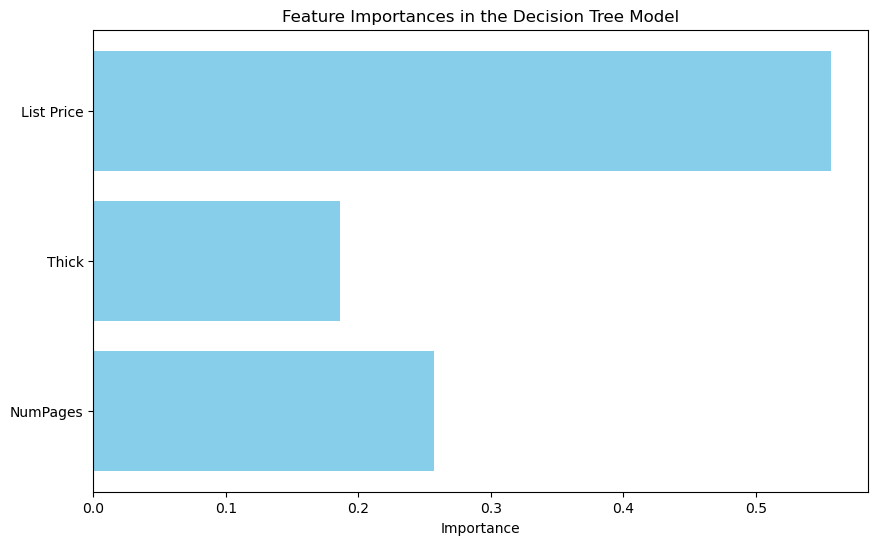

In [35]:
# Question 8
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_
import pandas as pd

# Combine the feature names with their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important feature
most_important_feature = sorted_features.iloc[0]
print(f"The most important feature is: {most_important_feature['Feature']} with importance of {most_important_feature['Importance']}")

import matplotlib.pyplot as plt

# Create a bar chart of the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in the Decision Tree Model')
plt.show()


Question 9 :
    In linear regression, the coefficients describe the strength of the relationship between the predictors and the outcome. In decision trees, the feature importance tells how much the predictor helped to predict the correct outcomes.
    Certainly! Here's a summary of our exchanges for your homework assignment:

---

### Summary of Interactions:

**Topic**: **Understanding Linear Regression Coefficients vs. Decision Tree Feature Importances**

1. **Linear Regression Coefficients**:
   - Coefficients in linear regression describe the **strength** and **direction** of the relationship between predictor variables and the outcome variable. They indicate how much the outcome will change for a one-unit increase in a given predictor, assuming other predictors remain constant. Larger absolute coefficients reflect stronger relationships.
   - However, coefficients do not directly describe the **importance** of a variable in the model. They only quantify the effect size, not the overall contribution to predictive accuracy.

2. **Decision Tree Feature Importances**:
   - In decision trees, **feature importances** indicate how much each feature contributes to the model's ability to make accurate predictions. Features that result in larger reductions in uncertainty (or "impurity") at decision nodes are considered more important. 
   - Feature importances do not describe a direct relationship between the predictor and the outcome, but rather measure the **predictive power** of the feature in guiding the decision tree’s splits.

3. **Comparison**:
   - **Linear Regression**: Coefficients describe the **association** between predictors and the target (outcome). Larger coefficients indicate stronger effects on the outcome.
   - **Decision Trees**: Feature importances tell you how much each feature helps the model make **better predictions**. Higher importance means a feature contributes more to the tree's predictive accuracy.

4. **Key Distinction**:
   - Coefficients explain the **relationship** between variables and outcomes.
   - Feature importances explain the **predictive value** of each feature in improving the model's accuracy.

This exchange aimed to clarify the differences in interpreting linear regression coefficients and decision tree feature importances, with a focus on their distinct roles in model interpretation.

---

Let me know if you'd like me to adjust or expand on any part of this summary!

Question 10 No